## Non-linear regression

Since we're fitting a straight line, it may seem impossible for this technique to be able to correctly fit more complicated relationships. In general that is true but scikit-learn provides preprocessing tools which can automatically transform your data into something which can be understood linearly.

Let's start by making some definitely non-linear data from a sine curve:

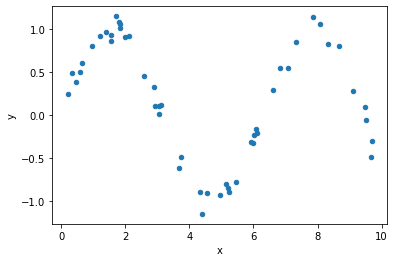

In [1]:
import numpy as np
from pandas import DataFrame

rng = np.random.RandomState(42)

number_of_points = 50
x_scale = 10

x = x_scale * rng.rand(number_of_points)
y = np.sin(x) + 0.1 * rng.normal(size=number_of_points)

sin_data = DataFrame({"x": x, "y": y})
sin_data.plot.scatter("x", "y")

Of course a linear fit will not work for this data (actually not true, a linear fit will give an answer for this data without trouble, it's just that the fit will be useless) so let's allow the data to be transformed by a polynomial basis-function before the linear regression. We put these together into a pipeline using scikit-learns's `make_pipeline()` function. This output of this function can be used in the same way as the standard `LinearRegression` model.

Let's make a pipeline which first applies a 7<sup>th</sup>-order polynomial and then fits it with a linear regression:

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

This `poly_model` can then be used like the plain `LinearRegression` model before and have the `fit()` method called on it.

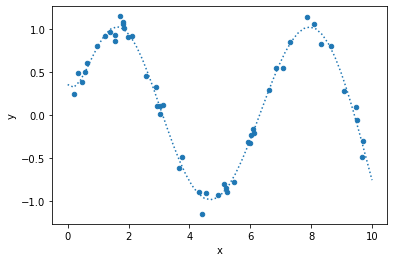

In [4]:
poly_model.fit(sin_data[["x"]], sin_data["y"])

xfit = np.linspace(0, x_scale)
yfit = poly_model.predict(xfit[:, np.newaxis])

ax = sin_data.plot.scatter("x", "y")
ax.plot(xfit, yfit, linestyle=":")

You can think of the combined "transform and linear fit" as being a single fit with a 7<sup>th</sup>-order polynomial.

### Exercise

- Change the order of the polynomial. When does the data start to fit well. What happens when you make the polynomial order very large?